In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
# Upload the impacts dataset
print("Upload the impacts dataset:")
uploaded_impacts = files.upload()
impacts_df = pd.read_csv('impacts.csv')

Upload the impacts dataset:


Saving impacts.csv to impacts.csv


In [4]:
# Display the first few rows of the impacts dataset
print("Impacts Dataset:")
print(impacts_df.head())

Impacts Dataset:
  Object Name  Period Start  Period End  Possible Impacts  \
0    2006 WP1          2017        2017                 1   
1     2013 YB          2017        2046                23   
2     2008 US          2017        2062                30   
3  2010 VR139          2017        2076                24   
4  2015 ME131          2017        2096                85   

   Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  \
0                   5.200000e-09              17.77                28.3   
1                   7.600000e-05               8.98                31.4   
2                   1.600000e-05              18.33                31.4   
3                   2.000000e-07               4.99                26.7   
4                   2.300000e-08              19.46                19.2   

   Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale  \
0                   0.007                     -8.31                  -8.31   
1        

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(impacts_df.isnull().sum())


Missing Values in Each Column:
Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64


In [6]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Specify the fraction of data to be set to NaN
missing_fraction = 0.1  # 10%

# Randomly select rows in a specified column to replace with NaN
for column in ['Asteroid Velocity', 'Asteroid Magnitude', 'Possible Impacts']:
    # Select random indices
    random_indices = np.random.choice(impacts_df.index,
                                       size=int(len(impacts_df) * missing_fraction),
                                       replace=False)
    impacts_df.loc[random_indices, column] = np.nan

# Check the DataFrame to see missing values
print(impacts_df.isnull().sum())


Object Name                       0
Period Start                      0
Period End                        0
Possible Impacts                 68
Cumulative Impact Probability     0
Asteroid Velocity                68
Asteroid Magnitude               68
Asteroid Diameter (km)            0
Cumulative Palermo Scale          0
Maximum Palermo Scale             0
Maximum Torino Scale              0
dtype: int64


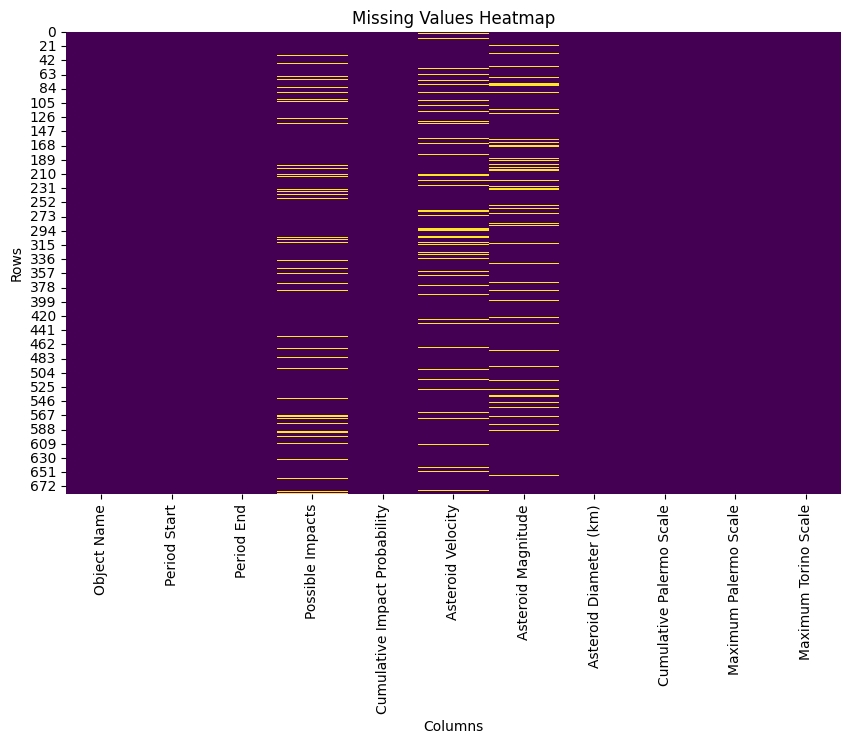

In [7]:
# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(impacts_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [8]:
# Fill or drop missing values
# Fill missing values with the mean for numerical columns
for column in impacts_df.select_dtypes(include=[np.number]).columns:
    impacts_df[column].fillna(impacts_df[column].mean(), inplace=True)

<ipython-input-8-a552e742d6e9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  impacts_df[column].fillna(impacts_df[column].mean(), inplace=True)


In [9]:
# Drop rows with missing values for non-numerical columns
impacts_df.dropna(subset=['Object Name'], inplace=True)

In [10]:
# Verify if missing values are handled
print("\nMissing Values After Handling:")
print(impacts_df.isnull().sum())


Missing Values After Handling:
Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64


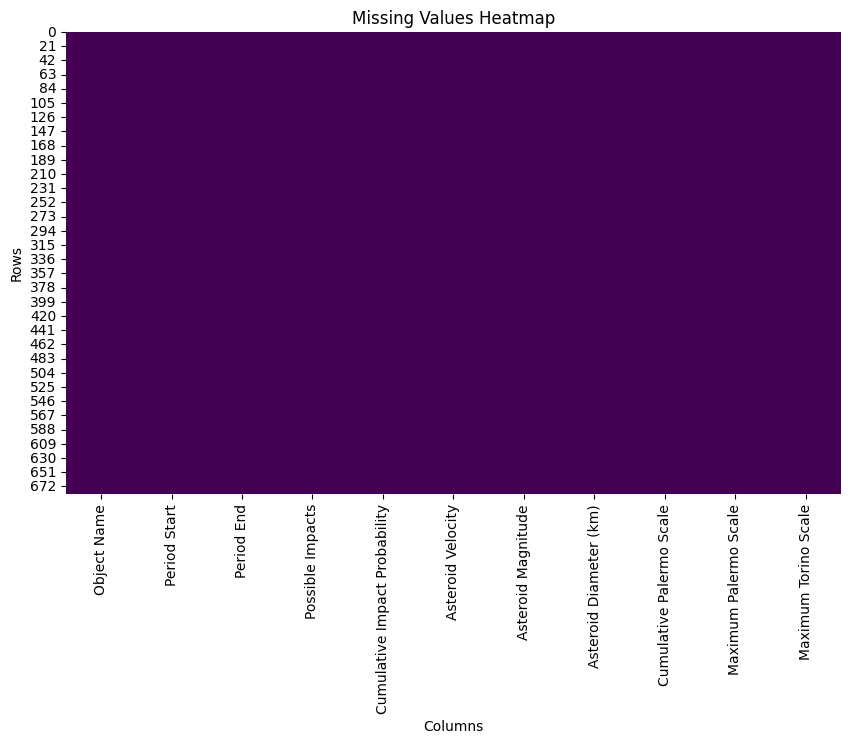

In [11]:
# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(impacts_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [12]:
# Checking for duplicates
duplicates = impacts_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [13]:
# Remove duplicates if any
if duplicates > 0:
    impacts_df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")

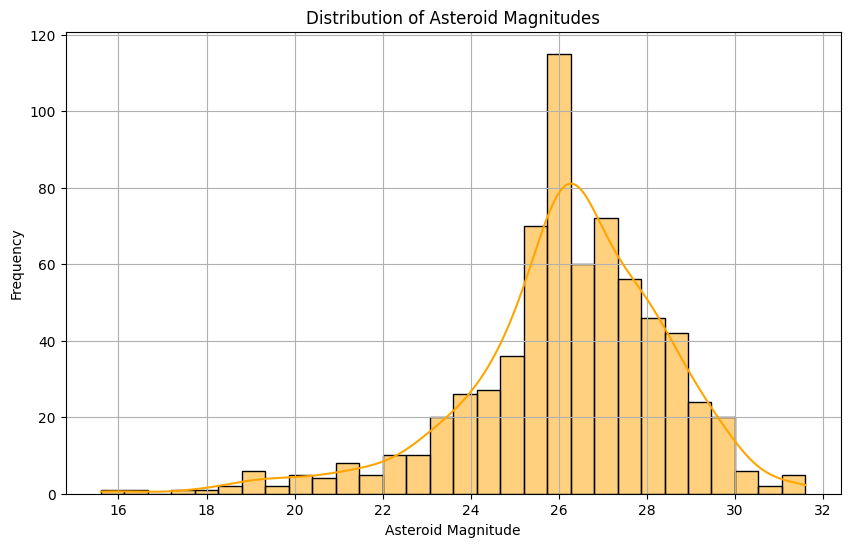

In [14]:
# Visualize the distribution of Asteroid Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Asteroid Magnitude'], bins=30, color='orange', kde=True)
plt.title('Distribution of Asteroid Magnitudes')
plt.xlabel('Asteroid Magnitude')
plt.ylabel('Frequency')
plt.grid()
plt.show()

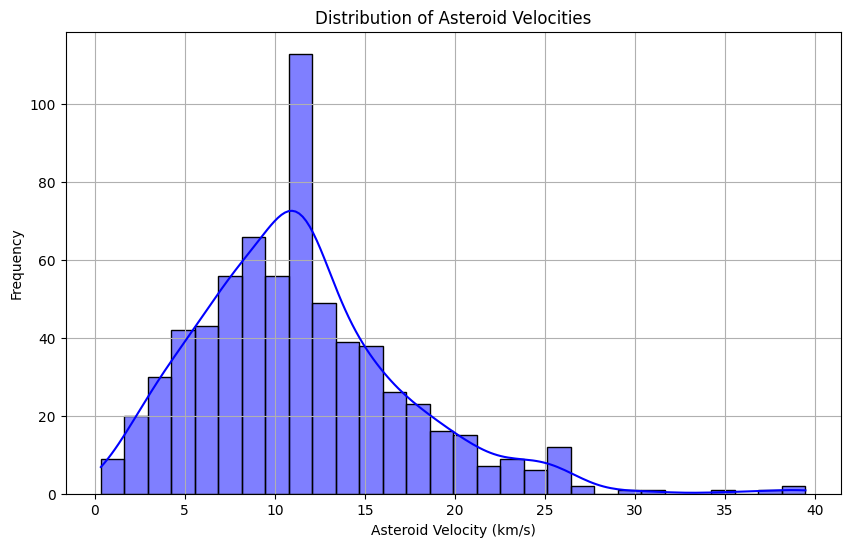

In [15]:
# Visualize the distribution of Asteroid Velocities
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Asteroid Velocity'], bins=30, color='blue', kde=True)
plt.title('Distribution of Asteroid Velocities')
plt.xlabel('Asteroid Velocity (km/s)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

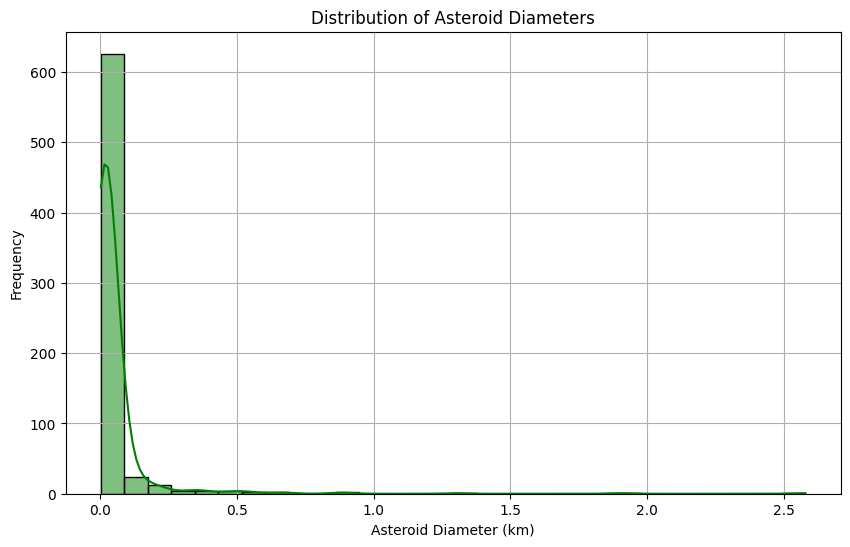

In [16]:
# Visualization of Distribution of Asteroid Diameter
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Asteroid Diameter (km)'], bins=30, color='green', kde=True)
plt.title('Distribution of Asteroid Diameters')
plt.xlabel('Asteroid Diameter (km)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

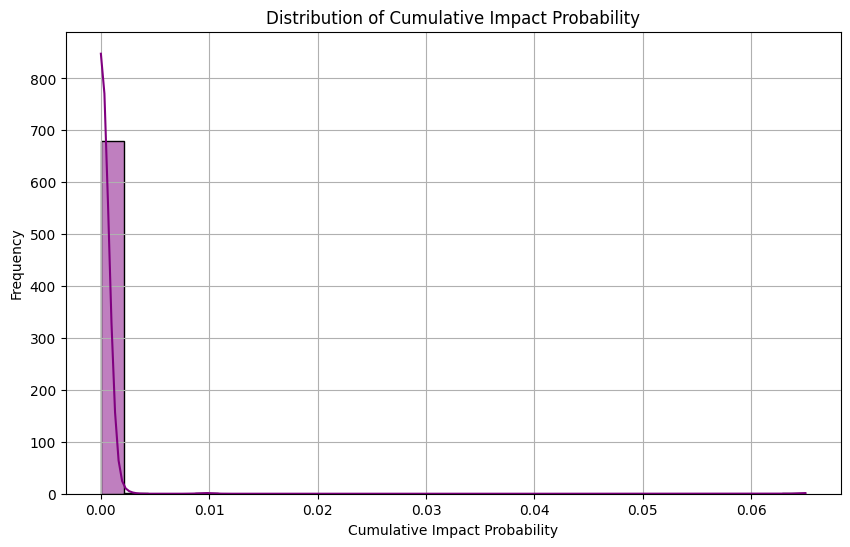

In [17]:
# Visualization of Cumulative Impact Probability
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Cumulative Impact Probability'], bins=30, color='purple', kde=True)
plt.title('Distribution of Cumulative Impact Probability')
plt.xlabel('Cumulative Impact Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

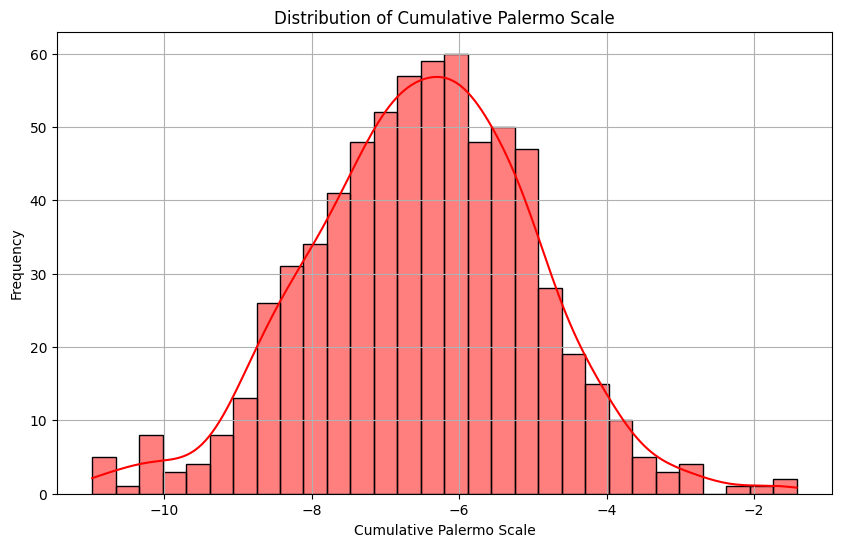

In [18]:
# Visualization of Cumulative Palermo Scale
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Cumulative Palermo Scale'], bins=30, color='red', kde=True)
plt.title('Distribution of Cumulative Palermo Scale')
plt.xlabel('Cumulative Palermo Scale')
plt.ylabel('Frequency')
plt.grid()
plt.show()

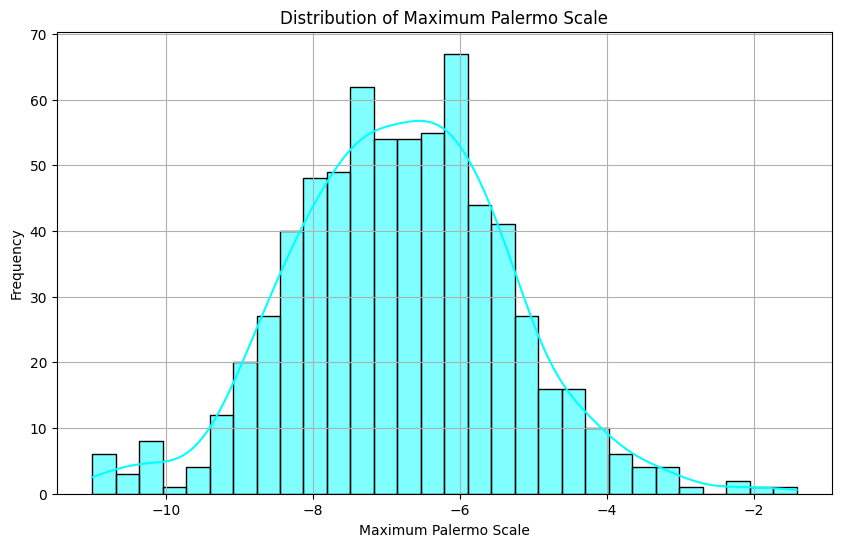

In [19]:

# Visualization of Maximum Palermo Scale
plt.figure(figsize=(10, 6))
sns.histplot(impacts_df['Maximum Palermo Scale'], bins=30, color='cyan', kde=True)
plt.title('Distribution of Maximum Palermo Scale')
plt.xlabel('Maximum Palermo Scale')
plt.ylabel('Frequency')
plt.grid()
plt.show()

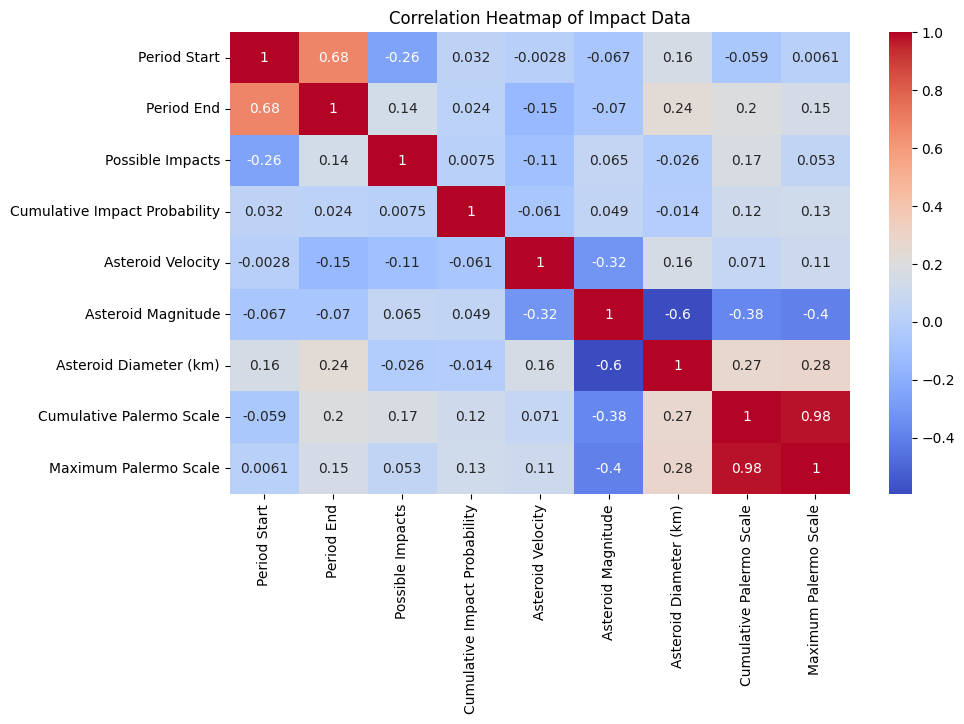

In [20]:
# Visualize the correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
numerical_df = impacts_df.select_dtypes(include=['number']) # Select only numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Impact Data')
plt.show()

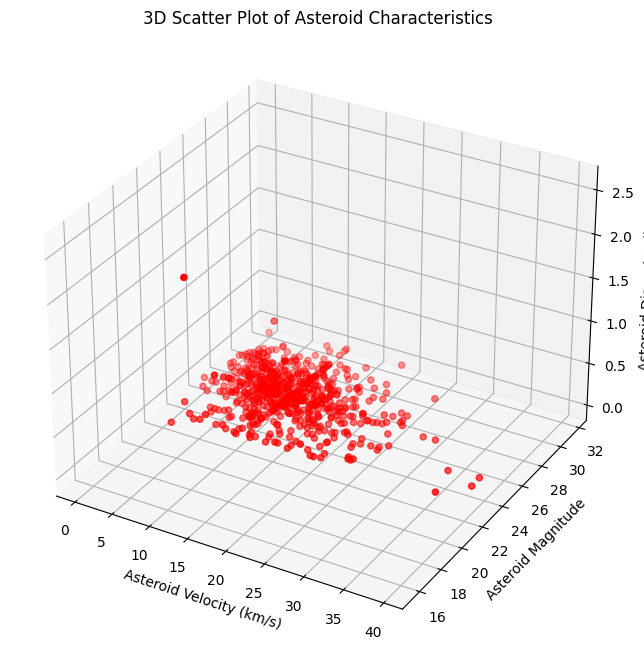

In [21]:
# 3D Scatter Plot of Asteroid Velocity, Magnitude, and Diameter
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(impacts_df['Asteroid Velocity'], impacts_df['Asteroid Magnitude'], impacts_df['Asteroid Diameter (km)'], c='r', marker='o')
ax.set_xlabel('Asteroid Velocity (km/s)')
ax.set_ylabel('Asteroid Magnitude')
ax.set_zlabel('Asteroid Diameter (km)')
ax.set_title('3D Scatter Plot of Asteroid Characteristics')
plt.show()